In [19]:
# !curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_160116.txt > turnstile_160116.csv
# !curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_160109.txt > turnstile_160109.csv
# !curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_160102.txt > turnstile_160102.csv
# !curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_151226.txt > turnstile_151226.csv
# !curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_151219.txt > turnstile_151219.csv
# !curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_151212.txt > turnstile_151212.csv
# !curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_151205.txt > turnstile_151205.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.1M    0 24.1M    0     0   252k      0 --:--:--  0:01:37 --:--:--  275k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.4M    0 24.4M    0     0   311k      0 --:--:--  0:01:20 --:--:--  223k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.9M    0 23.9M    0     0   305k      0 --:--:--  0:01:20 --:--:--  310k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.1M    0 24.1M    0     0   324k      0 --:--:--  0:01:16 --:--:-- 97734
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
# !touch turnstile.csv
# !cat turnstile_160116.csv >> turnstile.csv

In [20]:
import csv
from collections import defaultdict
from operator import itemgetter 
import dateutil.parser

In [21]:
turnstile = defaultdict(list)
turnstilets = defaultdict(list)

#####Q1. Read CSV, make dict where key is first 4 and value is rest. (turnstile)<br>
#####Q2. Combine Date and Time to datetime object, drop everything in value except datetime and entries

In [22]:
with open('old_turnstile.csv', 'rb') as ts:
    tsdata = csv.reader(ts)
    header = tsdata.next()
    for row in tsdata:
        key = row[:4]
        key = tuple(key)
        # v is the value for Q1
        v = row[4:]
        # vts is datetime value - date and timestamp
        vts = row[6] + ", " + row[7]
        vts = dateutil.parser.parse(vts)
        # tsvalue is value for Q2
        tsvalue = list()
        tsvalue.append(vts)
        tsvalue.append(int(row[9]))
        # Q1
        turnstile[key].append(v)
        # Q2
        turnstilets[key].append(tsvalue)

In [23]:
turnstilets['A002','R051','02-00-00','59 ST'][0:10]

[[datetime.datetime(2016, 1, 2, 3, 0), 5478180],
 [datetime.datetime(2016, 1, 2, 7, 0), 5478183],
 [datetime.datetime(2016, 1, 2, 11, 0), 5478262],
 [datetime.datetime(2016, 1, 2, 15, 0), 5478519],
 [datetime.datetime(2016, 1, 2, 19, 0), 5478940],
 [datetime.datetime(2016, 1, 2, 23, 0), 5479213],
 [datetime.datetime(2016, 1, 3, 3, 0), 5479279],
 [datetime.datetime(2016, 1, 3, 7, 0), 5479282],
 [datetime.datetime(2016, 1, 3, 11, 0), 5479344],
 [datetime.datetime(2016, 1, 3, 15, 0), 5479558]]

#####Q3. Every n hours (n = 4). We want daily totals. The total is cumulative so you must subtract.

In [24]:
daily = defaultdict(list)
for k, v in turnstilets.iteritems():
    previous = 0
    current = 0
    delta = 0
    for line in v:
        if v.index(line) % 6 == 0:
            dailyvalue = []
            # convert datetime to date and append to daily value
            dailyvalue.append(line[0].date())
            # current is entries
            current = line[1]
            # today's minus yesterday's
            delta = current - previous
            dailyvalue.append(delta)
            # append date/value pair to key
            # exclude first date of every key
            if previous != 0 and delta >= 0: 
                daily[k].append(dailyvalue)
            previous = current

In [7]:
daily['A002','R051','02-00-00','59 ST'][0:4]

[[datetime.date(2016, 1, 3), 1099],
 [datetime.date(2016, 1, 4), 758],
 [datetime.date(2016, 1, 5), 1758],
 [datetime.date(2016, 1, 6), 1641]]

#####Q4. plot the daily time series for one turnstile

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts.

In [26]:
dates = [d for d, c in sorted(daily['A002','R051','02-00-00','59 ST'])]
counts = [c for d, c in sorted(daily['A002','R051','02-00-00','59 ST'])]

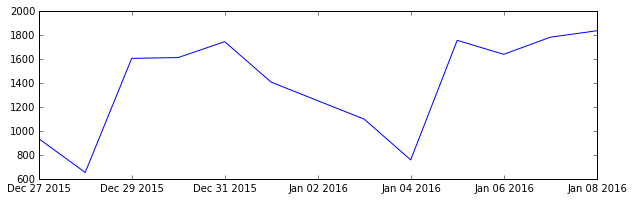

In [27]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)

#####Q5. Combine turnstiles at each ControlArea/Unit/Station combination.

In [28]:
units = defaultdict(list)

# make keys CA/Unit/Station
for k, v in daily.iteritems():
    key = k[0:2]+k[3:]
    if key not in units:
        units[key] = []
    units[key].append(daily[k])

chal5 = defaultdict(list)

# unzip dates in {units} values
# sum up entries across the same date
# re-populate new dict {chal5}
for k, v in units.items():
    v = zip(*v)
    chal5[k] = []
    for dt in v:
        dtsum = 0
        for turnstile in dt:
            dtsum += turnstile[1]
        dtpair = [dt[0][0], dtsum]
        chal5[k].append(dtpair)

In [29]:
chal5['A002','R051','59 ST'][0:10]

[[datetime.date(2016, 1, 3), 10830],
 [datetime.date(2016, 1, 4), 7982],
 [datetime.date(2016, 1, 5), 17156],
 [datetime.date(2016, 1, 6), 16463],
 [datetime.date(2016, 1, 7), 17865],
 [datetime.date(2016, 1, 8), 17924],
 [datetime.date(2015, 12, 27), 8885],
 [datetime.date(2015, 12, 28), 7751],
 [datetime.date(2015, 12, 29), 16091],
 [datetime.date(2015, 12, 30), 15811]]

######Q6. Aggregate to station-level

In [30]:
# same as above. probs should've modularized in some way.
temp6 = defaultdict(list)
# make temp list and populate with keys of stations
for k, v in chal5.iteritems():
    key = k[2]
    temp6[key].append(chal5[k])

station = defaultdict(list)

for k, v in temp6.items():
    v = zip(*v)
    for dt in v:
        dtsum = 0
        for unit in dt:
            dtsum += unit[1]
        dtpair = [dt[0][0], dtsum]
        station[k].append(dtpair)

#####Q7. Plot time-series for a station

In [31]:
# sample some stations
sample = [key for key in station.keys()[0:50]]
print sample

['CYPRESS AV', '5 AV/53 ST', 'NEWKIRK PLAZA', 'PATH WTC', 'HUNTS POINT AV', 'SUTTER AV', '149/GRAND CONC', 'BROAD ST', 'GRAND-NEWTOWN', 'EASTCHSTER/DYRE', 'HIGH ST', 'BEVERLY RD', 'ATLANTIC AV', 'WAKEFIELD/241', 'CROWN HTS-UTICA', 'VAN SICLEN AV', 'BEVERLEY ROAD', '18 AV', 'BRIARWOOD', '135 ST', 'CORTELYOU RD', 'LORIMER ST', '21 ST-QNSBRIDGE', 'VAN SICLEN AVE', 'SUTPHIN-ARCHER', '67 AV', 'BAY RIDGE AV', 'NECK RD', 'CYPRESS HILLS', '3 AV 138 ST', '14TH STREET', 'W 8 ST-AQUARIUM', '42 ST-BRYANT PK', 'BEACH 67 ST', '71 ST', 'NEWARK C', 'PRESIDENT ST', '116 ST-COLUMBIA', 'SUTTER AV-RUTLD', 'KOSCIUSZKO ST', '3 AV', 'BRONX PARK EAST', '8 ST-NYU', 'TIMES SQ-42 ST', '75 ST-ELDERTS', 'GROVE STREET', 'QUEENS PLAZA', 'CASTLE HILL AV', 'FRANKLIN AV', "B'WAY-LAFAYETTE"]


In [32]:
dates_station = [d for d, c in sorted(station['CROWN HTS-UTICA'])]
counts_station = [c for d, c in sorted(station['CROWN HTS-UTICA'])]

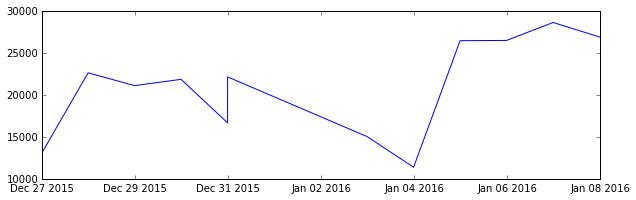

In [33]:
plt.figure(figsize=(10,3))
plt.plot(dates_station, counts_station)

#####Q8. Make list of counts for one week for one station. Plot by day of week.

In [34]:
# just gonna add day of week to everything
for k, v in station.items():
    for dt in v:
        dt.append(dt[0].strftime('%A'))

In [42]:
days_of_week = []
for dt in dates_station:
    days_of_week.append(dt.strftime('%A'))

note to self: just realized dates_station has multiple dates on 12/31 and 1/7 ?? oh no?? why! probs bc of how I deal with nulls...

In [51]:
print days_of_week

['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Thursday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Thursday', 'Friday']


([<matplotlib.axis.XTick at 0x105339a50>,
 <a list of 6 Text xticklabel objects>)

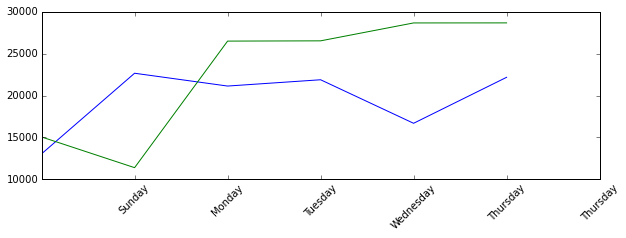

In [53]:
plt.figure(figsize=(10,3))
plt.plot(counts_station[0:6])
plt.plot(counts_station[6:12])
plt.xticks([1, 2, 3, 4, 5, 6], days_of_week[0:7], rotation=45)

##### Q9. Sum total ridership for each station and sort them

In [54]:
station['CYPRESS AV']

[[datetime.date(2016, 1, 3), 2079, 'Sunday'],
 [datetime.date(2016, 1, 4), 1795, 'Monday'],
 [datetime.date(2016, 1, 5), 4012, 'Tuesday'],
 [datetime.date(2016, 1, 6), 4070, 'Wednesday'],
 [datetime.date(2016, 1, 7), 4103, 'Thursday'],
 [datetime.date(2016, 1, 8), 4263, 'Friday'],
 [datetime.date(2015, 12, 27), 2099, 'Sunday'],
 [datetime.date(2015, 12, 28), 1762, 'Monday'],
 [datetime.date(2015, 12, 29), 3488, 'Tuesday'],
 [datetime.date(2015, 12, 30), 3406, 'Wednesday'],
 [datetime.date(2015, 12, 31), 3526, 'Thursday'],
 [datetime.date(2016, 1, 1), 3463, 'Friday']]

In [55]:
total_by_station = {}

In [61]:
for k, v in station.items():
    total_entries = 0
    for date, entries, dayofweek in v:
        total_entries += entries
    total_by_station[k] = total_entries

In [62]:
total_by_station['CYPRESS AV']

38066

##### Q10. Plot sorted dict as histogram

In [77]:
station_keys = []
total_ridership_counts = []
for k, v in total_by_station.items():
    station_keys.append(k)
    total_ridership_counts.append(v)
print station_keys[0]
print total_ridership_counts[0]

CYPRESS AV
38066


In [78]:
for x in total_ridership_counts:
    if x > 1.94243399e+08:
        print x, total_ridership_counts.index(x), station_keys[total_ridership_counts.index(x)]

201653447 137 KINGS HWY
1212671293 156 6 AV
417536536 229 59 ST COLUMBUS
1952433987 242 163 ST-AMSTERDM
805492591 298 36 ST


In [79]:
del total_ridership_counts[298]
del station_keys[298]
del total_ridership_counts[242]
del station_keys[242]
del total_ridership_counts[229]
del station_keys[229]
del total_ridership_counts[156]
del station_keys[156]
del total_ridership_counts[137]
del station_keys[137]

(array([ 364.,    1.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    1.]),
 array([  0.00000000e+00,   1.15590491e+07,   2.31180982e+07,
          3.46771473e+07,   4.62361964e+07,   5.77952455e+07,
          6.93542946e+07,   8.09133437e+07,   9.24723928e+07,
          1.04031442e+08,   1.15590491e+08]),
 <a list of 10 Patch objects>)

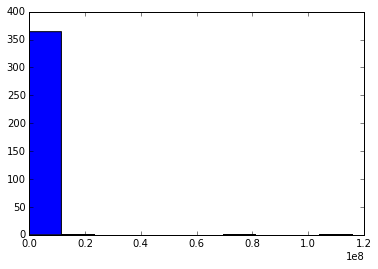

In [80]:
plt.hist(total_ridership_counts)

In [81]:
for x in total_ridership_counts:
    if x > 1000000:
        print x, total_ridership_counts.index(x), station_keys[total_ridership_counts.index(x)]

2446266 20 135 ST
75740753 50 47-50 STS ROCK
2280082 59 RECTOR ST
1272548 112 GRD CNTRL-42 ST
1773384 152 FULTON ST
1684046 194 34 ST-PENN STA
115590491 241 JACKSON AV
4144217 288 14 ST-UNION SQ
12973472 293 UTICA AV
1054057 321 86 ST
1514243 362 THIRTY THIRD ST


In [82]:
del total_ridership_counts[362]
del station_keys[362]
del total_ridership_counts[321]
del station_keys[321]
del total_ridership_counts[293]
del station_keys[293]
del total_ridership_counts[288]
del station_keys[288]
del total_ridership_counts[241]
del station_keys[241]
del total_ridership_counts[194]
del station_keys[194]
del total_ridership_counts[152]
del station_keys[152]
del total_ridership_counts[112]
del station_keys[112]
del total_ridership_counts[59]
del station_keys[50]
del total_ridership_counts[20]
del station_keys[20]

(array([ 356.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([        0. ,   7574075.3,  15148150.6,  22722225.9,  30296301.2,
         37870376.5,  45444451.8,  53018527.1,  60592602.4,  68166677.7,
         75740753. ]),
 <a list of 10 Patch objects>)

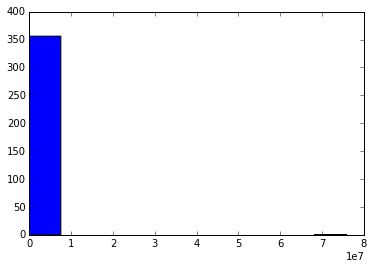

In [83]:
plt.hist(total_ridership_counts)

#####Conclusion

At some level I messed up the summation of the data and ended up with wildly inflated (> 1 million for 2 week timeframe) data for roughly 20 stations. These were some of the most popular stations but the numbers were way off. At first I excluded some outliers but then I realized I was rendering my data meaningless. Furthermore, something with the way I made the time series removed all Saturday data and split Thursday data into two bins. Further investigation would be needed but at this point I need to move on to the Luther challenges so I am submitting for now and (hopefully) coming back to this.